# PARTIE DATASET MNIST

In [3]:
from keras.datasets import mnist

# charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Forme de X_train : {X_train.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_test : {y_test.shape}")

Forme de X_train : (60000, 28, 28)
Forme de y_train : (60000,)
Forme de X_test : (10000, 28, 28)
Forme de y_test : (10000,)


In [4]:
# On normalise les données pour accellerer l'apprentissage
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
# On reshape pour pouvoir utiliser CNN 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(f"Forme de X_train : {X_train.shape}")
print(f"Forme de y_train : {y_train.shape}")

Forme de X_train : (60000, 28, 28, 1)
Forme de y_train : (60000,)


In [6]:
from tensorflow.keras.utils import to_categorical

# Encodage one-hot des labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Forme de y_train après encodage : {y_train.shape}")


Forme de y_train après encodage : (60000, 10)


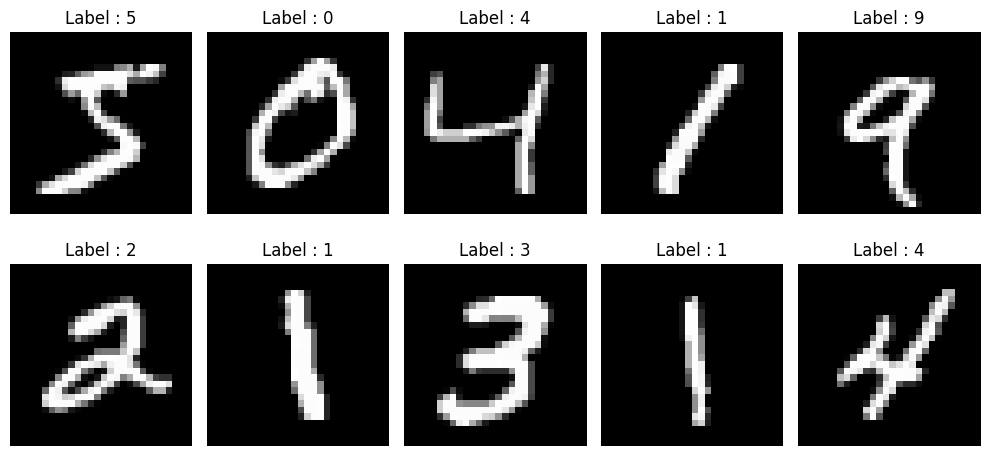

In [7]:
import matplotlib.pyplot as plt

# Visualisation de quelques images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')  # Suppression de la dimension supplémentaire pour l'affichage
    plt.title(f"Label : {y_train[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()


CONSTRUCTION D'UN MODELE CNN

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam


In [9]:
# Initialisation du modèle
model = Sequential()
# Couches de convolution et de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Deuxième couche de convolution et pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Couche Flatten (mise à plat des données)
model.add(Flatten())
# Couches pleinement connectées (dense layers)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularisation pour éviter le surapprentissage
model.add(Dense(10, activation='softmax'))  # 10 classes pour les chiffres 0-9
# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Résumé du modèle
model.summary()

c:\Users\etien\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8637 - loss: 0.4252 - val_accuracy: 0.9856 - val_loss: 0.0456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9749 - loss: 0.0869 - val_accuracy: 0.9897 - val_loss: 0.0317
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9817 - loss: 0.0620 - val_accuracy: 0.9901 - val_loss: 0.0302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0458 - val_accuracy: 0.9913 - val_loss: 0.0276
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9887 - loss: 0.0365 - val_accuracy: 0.9912 - val_loss: 0.0295
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9889 - loss: 0.0343 - val_accuracy: 0.9922 - val_loss: 0.0267
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9930 - val_loss: 0.0266
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9916 - loss: 0.0256 -

In [11]:
# Évaluer la précision sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Précision sur le jeu de test : {test_accuracy:.2f}")

Précision sur le jeu de test : 0.99


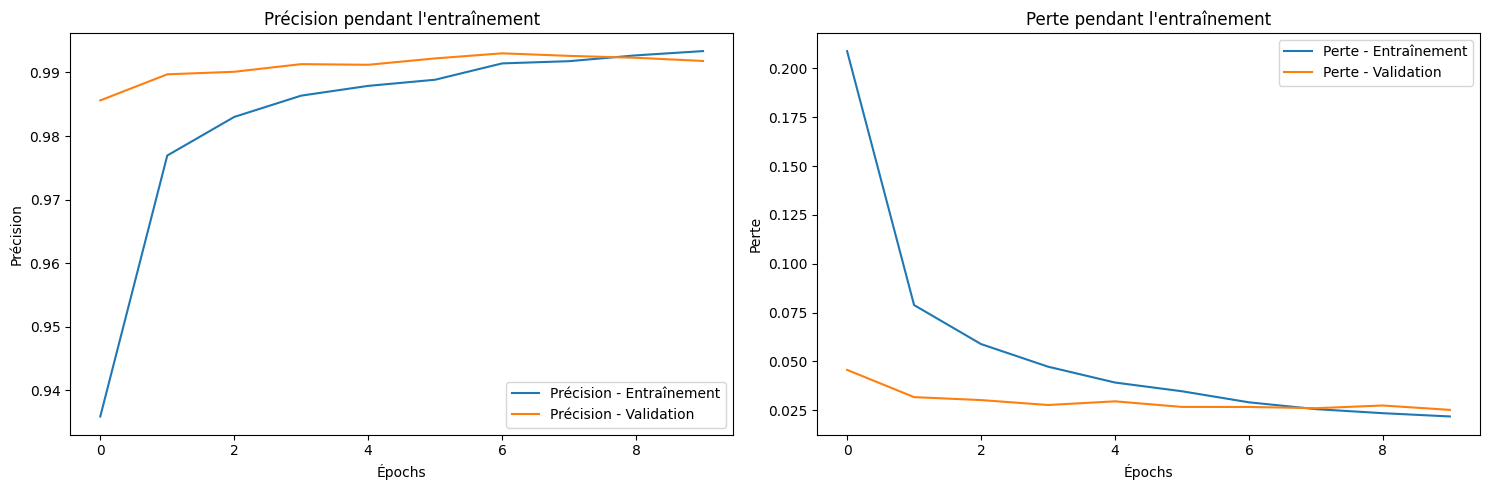

In [32]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Courbe de précision (left subplot)
ax1.plot(history.history['accuracy'], label='Précision - Entraînement')
ax1.plot(history.history['val_accuracy'], label='Précision - Validation')
ax1.set_title('Précision pendant l\'entraînement')
ax1.set_xlabel('Épochs')
ax1.set_ylabel('Précision')
ax1.legend()

# Courbe de perte (right subplot)
ax2.plot(history.history['loss'], label='Perte - Entraînement')
ax2.plot(history.history['val_loss'], label='Perte - Validation')
ax2.set_title('Perte pendant l\'entraînement')
ax2.set_xlabel('Épochs')
ax2.set_ylabel('Perte')
ax2.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [13]:
import numpy as np
# Prédire les probabilités pour chaque classe
predictions = model.predict(X_test)

# Obtenir les classes prédites (indice avec la probabilité maximale)
predicted_classes = np.argmax(predictions, axis=1)

# Obtenir les vraies classes
true_classes = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


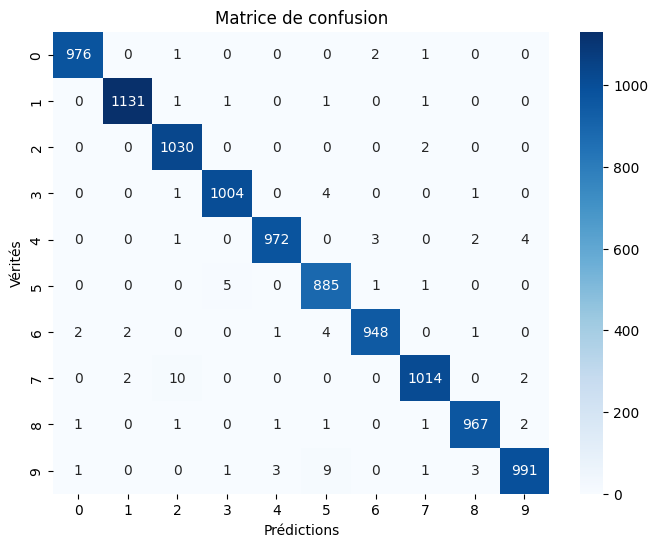

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion')
plt.show()


In [15]:
from sklearn.metrics import classification_report

# Rapport de classification
report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [16]:
from sklearn.metrics import accuracy_score

# Calculer la précision globale
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Précision globale sur le jeu de test : {accuracy:.2f}")

Précision globale sur le jeu de test : 0.99


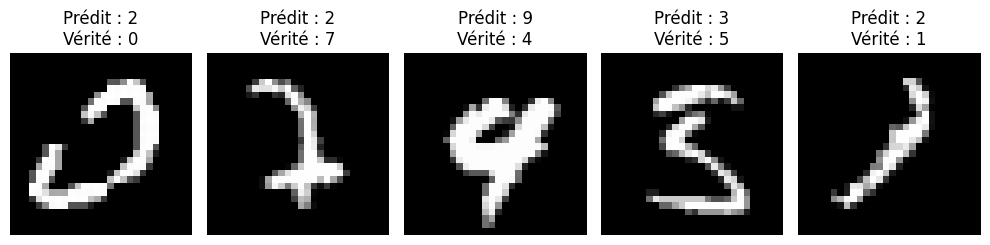

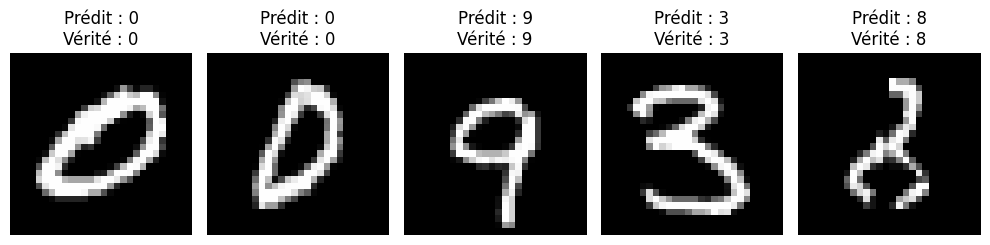

In [31]:
import numpy as np

# Trouver les indices des erreurs
errors = np.where(predicted_classes != true_classes)[0]
# Trouver les indices des prédictions correctes
successes = np.where(predicted_classes == true_classes)[0]

# Afficher quelques exemples d'erreurs
plt.figure(figsize=(10, 5))
random_errors = np.random.choice(errors, 5, replace=False)  # Sélectionner 5 indices aléatoires
for i, error_idx in enumerate(random_errors):  # Afficher les 5 premières erreurs
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[error_idx].squeeze(), cmap='gray')
    plt.title(f"Prédit : {predicted_classes[error_idx]}\nVérité : {true_classes[error_idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Afficher quelques exemples de prédictions correctes aléatoires
plt.figure(figsize=(10, 5))
random_successes = np.random.choice(successes, 5, replace=False)  # Sélectionner 5 indices aléatoires
for i, success_idx in enumerate(random_successes):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[success_idx].squeeze(), cmap='gray')
    plt.title(f"Prédit : {predicted_classes[success_idx]}\nVérité : {true_classes[success_idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()